# Compose

In [1]:
class: CommandLineTool
cwlVersion: v1.1
id: head
baseCommand:
  - head
inputs:
  - id: number_of_lines
    type: int?
    inputBinding:
      position: 0
      prefix: '-n'
  - id: headinput
    type: File
    inputBinding:
      position: 1
outputs:
  - id: headoutput
    type: stdout
label: head
stdout: head.out

tool 'head' registered

In [2]:
class: CommandLineTool
cwlVersion: v1.1
id: tail
baseCommand:
  - tail
inputs:
  - id: number_of_lines
    type: int?
    inputBinding:
      position: 0
      prefix: '-n'
  - id: tailinput
    type: File
    inputBinding:
      position: 1
outputs:
  - id: tailoutput
    type: stdout
label: tail
stdout: tail.out

tool 'tail' registered

In [3]:
% newWorkflow main
% newWorkflowAddStep tail tailstepid
% newWorkflowAddStep head headstepid
% newWorkflowAddInput headstepid headinput
id: inputfile
type: File
% newWorkflowAddStepIn tailstepid headstepid headoutput
tailinput: headstepid/headoutput
% newWorkflowAddOutputSource tailstepid/tailoutput File
% newWorkflowBuild

{"cwlVersion": "v1.0", "class": "Workflow", "id": "main", "inputs": [{"id": "inputfile", "type": "File"}], "outputs": [{"id": "tailoutput", "type": "File", "outputSource": "tailstepid/tailoutput"}], "steps": {"tailstepid": {"run": "tail.cwl", "in": {"tailinput": "headstepid/headoutput"}, "out": ["tailoutput"]}, "headstepid": {"run": "head.cwl", "in": {"headinput": "inputfile"}, "out": ["headoutput"]}}, "requirements": {}}

In [4]:
% execute main
inputfile: 
    class: File
    location: /Users/dks/Workspaces/CWLKernel/tests/input_data/data.csv

Add data in memory

{"tailoutput": {"location": "file:///private/tmp/CWLKERNEL_DATA/d8f78c63-0b6a-413b-b60e-03d8f96165c8/runtime_data/tail.out", "basename": "tail.out", "nameroot": "tail", "nameext": ".out", "class": "File", "checksum": "sha1$e186f07099395040cf9d83ff1eb0a5dad4801937", "size": 688, "http://commonwl.org/cwltool#generation": 0, "id": "tailoutput", "result_counter": 0}}

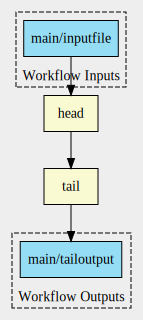

In [5]:
% view main